In [1]:
# 设置cell宽度
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 警告
import warnings
warnings.filterwarnings('ignore')

# matplotlib
from tqdm import tqdm
from pprint import pprint
from matplotlib import pylab
from seaborn import set_style
set_style("darkgrid")
%matplotlib inline

# matplotlib 中文乱码、正负号乱码
from platform import system
os_name = system()
print(os_name)

from matplotlib import rcParams
rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
if os_name == r"Windows":
    rcParams["font.sans-serif"]=["SimHei"] #设置字体
elif os_name == r"Darwin":
    rcParams['font.family'] = 'PingFang HK'
else:
    pass


# 调整运行根目录
import os
# os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
# os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
#os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
print(os.getcwd()) 

# Dataframe显示格式
from pandas import set_option
set_option('display.max_info_rows',1000)
set_option('display.max_rows',1000)
set_option('display.max_columns',1000)
set_option('display.max_colwidth',1000)
set_option('display.float_format',lambda x : '%.4f' % x)

Windows
D:\github\xueqiu\Date20221228 指数成分股重叠和相关性


In [2]:
from pandas import read_csv, read_excel
from os import getcwd, sep
from matplotlib import pyplot
import re

In [3]:
# 中证全指
weight = getcwd() + sep + r"data" + sep + r"000985closeweight.xls"
weight = read_excel(weight)
weight.columns = [''.join(re.findall(re.compile(u'[\u4e00-\u9fa5]'), i)) for i in weight.columns]
weight.sort_values("权重", inplace=True,ascending=False)
weight.index = list(range(1, weight.shape[0] + 1))
weight["累计权重"] = weight["权重"].cumsum()

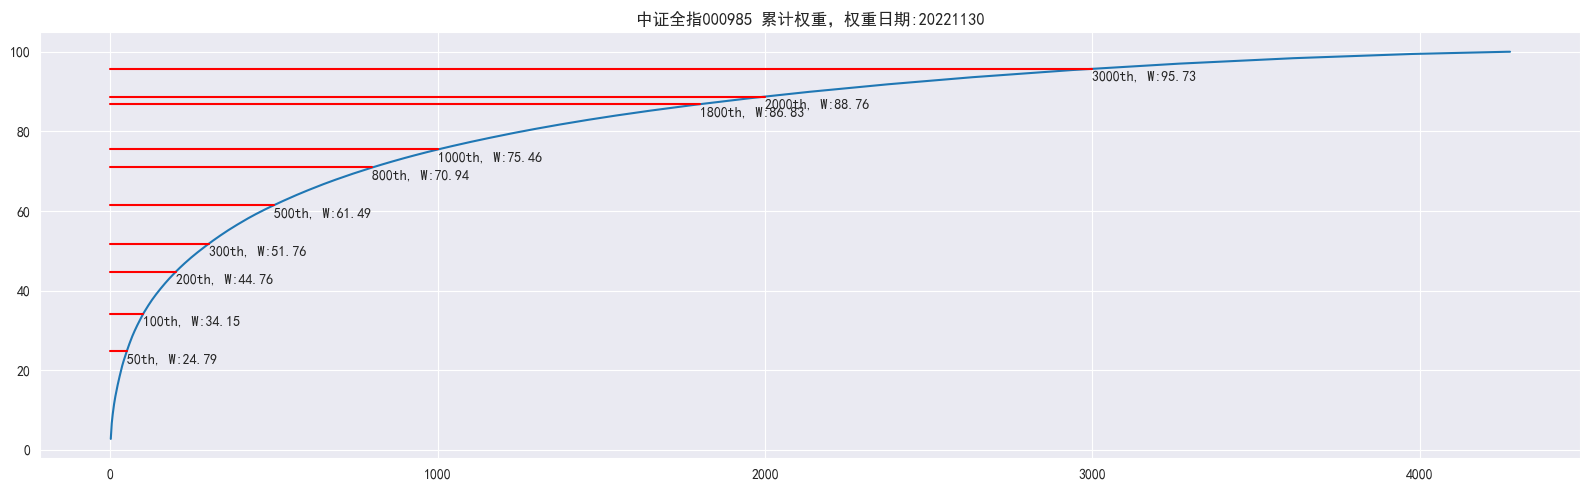

In [10]:
fig = pyplot.figure(figsize=(16, 5))
ax = fig.add_subplot(111)
weight["累计权重"].plot(ax=ax)

for row_num in [50, 100, 200, 300, 500, 800, 1000, 1800, 2000, 3000]:
    row_weight = weight.loc[row_num, "累计权重"]
    pyplot.plot([0, row_num], [row_weight, row_weight], color="r")
    ax.text(x=row_num, y= row_weight-3, s="{}th, W:{:.2f}".format(row_num, row_weight))
ax.set_title("中证全指000985 累计权重，权重日期:{}".format(weight["日期"].iloc[0]))
pyplot.tight_layout()
pyplot.show()
fig.savefig("中证全指累计权重.jpg", dpi=300)